<a href="https://colab.research.google.com/github/Fiiila/Other_stuff/blob/main/AI/Co_dela_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Co vlastně dělá AI?**

> Co všechno za úlohy se schovává pod pojmem AI?

> Jednotlivé kroky zkusíme rozebrat v následujícím colabu 

## Klasifikace


Úloha klasifikace možná zní trochu moc vědecky, ale nejde o nic jiného než automatické třídění libovolných dat do předem určených tříd (kategorií) na základě definovaných parametrů, které má každá třída.

V následujícím kódu si můžete prohlédnout, jak by vypadala klasifikace dopravních prostředků. Představte si, že pomocí například kamery a váhy nebo jiných senzorů, které se vyskytují v úseku silnice získají následující data:

*   Počet kol
*   Hmotnost vozidla

Pro reálné využití však může být výhodnější použít například pouze kameru nebo jiné senzory, záleží na aplikaci a dostupných možnostech.

Na začátku máme k datasetu i informaci od učitele (člověka), která nám říká, do jaké třídy jednotlivé objekty datasetu zařadit.

Jako první si natrénujeme klasifikátor - algoritmus, kterému poté předložíme nějaký neznámý objekt a ten ho následně klasifikuje do třídy.

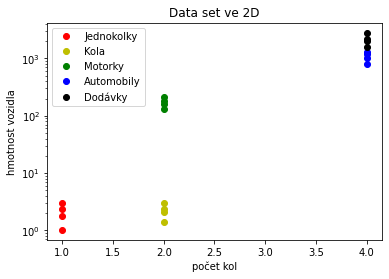

In [ ]:
#@title {run:"auto"}
#Import kihoven
import matplotlib.pyplot as plt
import numpy as np



#Dataset
Jednokolky = [[1,3],[1,1],[1,1.8],[1,2.4]]
Kola = [[2,3],[2,1.4],[2,2.1],[2,2.4]]
Motorky = [[2,130],[2,160],[2,180],[2,210]]
Automobily = [[4,1000],[4,810],[4,1280],[4,1190]]
Dodávky  = [[4,2000],[4,2810],[4,1580],[4,2190]]


data = [Jednokolky,Kola,Motorky,Automobily,Dodávky] #shrnutí jednotlivých dat do jednoho 'pole polí'
colors = ['ro', 'yo', 'go', 'bo', 'ko', 'mo'] #barvy pro jednotlivé kategorie


# Vykreslení dat do grafu
for i in range(0,len(data)):
    datVkategorii = len(data[i]) #zjištění kolik dat je v jednotlivé kategorii
    tempX = np.zeros(datVkategorii)
    tempY = np.zeros(datVkategorii)
    for j in range(0,datVkategorii):
      tempX[j] = data[i][j][0]
      tempY[j] = data[i][j][1]
    plt.plot(tempX,tempY,colors[i])
plt.title('Data set ve 2D')
plt.legend(['Jednokolky','Kola','Motorky','Automobily','Dodávky'])
plt.xlabel('počet kol')
plt.ylabel('hmotnost vozidla')
#@markdown Styl grafu
scale = 'log' #@param ["linear", "log"] {type:"string"}
plt.yscale(scale) 
plt.show()

Všiměte si červeného bodu v levém dolním rohu grafu. Vypadá to na jediný bod, ve skutečnosti je to však několik bodů, které se překrývají.

Tady by měl datový analytik zbystřit zrak a zkusit jinou vizualizaci dat (třeba logaritmickou) Konec konců přece nechcete přehlédnout celý trh s jednokolkami jen proto, že se tváří, že je malý v datasetu.

Nyní máme natrénovaný klasifikátor a můžeme začít klasifikovat objekty u nichž neznáme třídu.

V následujícím demu si můžete vyzkoušet funkčnost modelu natrénovaného na datasetu uvedeném v první části.

Vyzkoušejme klasifikovat nějaký objekt. Tento objekt má 4 kola a váží 1118 Kg (bod [4,1118]), kam ho počítač klasifikuje?

Zkuste provést klasifikaci i pro jiný bod libovolně zvolený podle vás a pozorujte, kam bude bod klasifikovaný.

Podrobnější popis použitého modelu najdete zde: [sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)

In [ ]:
#import knihoven
from sklearn.naive_bayes import GaussianNB #Numericko-matematická knihovna
import numpy as np

#Vytvoření modelu 
model = GaussianNB()

kategorie = ['Jednokolky','Kola','Motorky','Automobily','Dodávky']

classes = []

dataset = []

#Kod pro přetvoření do numpy array
for i in range(0,len(data)):
  for j in data[i]:
    classes.append(i)
    dataset.append(np.array(j))
  
#trénování modelu
model.fit(dataset,classes)
print('Model natrénován')

#@title Definice našeho BODu {run:"auto"}
#má 2 kola a váží cca 140Kg
pocetKol =   2#@param{type:"integer"}
hmotnost = 140 #@param{type:"integer"}
bod_ke_klasifikaci = np.array([[pocetKol,hmotnost]])


#predikce modelu
x = model.predict(bod_ke_klasifikaci)

print('Kategorie:', kategorie[x[0]])

Model natrénován
Kategorie: Motorky


# Import vlastních dat
Následující dva přístupy zpracování dat si můžete vyzkoušet na svých vlastních datech. Ty si můžete do zdejšího colabu importovat jako CSV (Comma Separated Values) pomocí následující sekvence kódů.

Podmínky na soubor:
* dva sloupce dat
* první sloupec musí představovat osu **x** a ideálně by data měla být seřazená vzestupně (tzn. 0,1,2,3...)
* druhý sloupec musí obsahovat data pro osu **y** libovolně dle výběru
* každý sloupec musí obsahovat stejný počet hodnot
* soubor nesmí obsahovat hlavičku dat

Soubor vytvořte v Excelu nebo v poznámkovém bloku či generátoru (např. https://guoguibing.github.io/librec/datagen.html).

Pro vyzkoušení a demonstraci však postačí vzorový náhodný dataset, který načtete do paměti spuštěním následující buňky.

In [ ]:
#vzorová vstupní data
import numpy as np

dataX = [ 5.05,  4.45, 11.25,  9.6 ,  8.75,  5.6 , 14.5 , 19.9 , 21.95,
       15.3 , 20.95, 14.45, 16.8 , 18.9 , 16.8 ,  8.2 ,  7.4 ,  5.45,
        6.85,  6.85,  3.15,  5.3 ,  6.4 ,  6.4 ,  7.  ,  5.95,  5.3 ,
        5.2 ,  5.75,  6.25,  6.9 ,  9.6 , 24.35, 23.15, 15.95, 20.3 ,
       20.35, 19.7 , 19.3 , 22.45, 22.85, 22.25, 21.1 , 21.05, 19.9 ,
       19.2 , 20.95, 21.45, 22.05, 21.95, 19.7 , 19.3 , 20.05, 20.6 ,
       21.7 , 23.2 , 23.6 , 22.5 , 21.75, 20.2 , 19.5 , 21.85, 22.9 ,
       34.1 , 27.05, 29.8 , 32.95, 31.  , 31.5 , 32.6 , 31.65, 31.1 ,
       32.4 , 32.85, 32.15, 30.75, 31.05, 34.05, 32.55, 30.15, 28.35,
       30.05, 32.45, 33.3 , 31.1 , 32.2 , 32.6 , 28.9 , 28.45, 31.6 ,
       31.65, 33.4 , 33.55, 38.25, 36.4 , 32.6 , 38.1 , 39.7 , 39.45,
       39.25, 39.45, 36.8 , 38.2 , 38.4 , 38.7 , 39.15, 39.6 , 38.  ,
       38.05, 39.35, 40.  , 39.95, 39.4 , 38.95, 39.2 , 39.3 , 37.9 ,
       36.2 , 37.3 , 40.05, 41.2 , 40.85, 39.7 , 35.3 , 37.5 , 34.3 ,
       26.45, 26.1 ]
dataY = [17.65, 13.75, 16.35, 10.3 ,  6.05,  4.55,  5.  ,  2.7 , 13.15,
       14.2 ,  7.35,  9.6 , 12.15, 10.65,  9.45, 13.15, 15.65, 14.3 ,
       12.65, 14.55, 15.75, 15.25, 14.4 , 14.1 , 15.1 , 15.55, 14.95,
       14.65, 15.1 , 14.9 , 13.45, 11.5 ,  5.45,  3.65,  3.1 , 15.7 ,
        6.05,  6.8 ,  9.4 ,  9.2 ,  7.65,  6.7 ,  7.15,  8.7 ,  9.3 ,
        7.75,  7.9 ,  8.35,  7.15,  6.3 ,  6.65,  8.2 ,  8.75,  8.65,
       11.25,  9.25,  8.2 ,  7.65,  9.2 , 10.35,  9.95,  5.9 ,  6.7 ,
        2.65,  1.55,  1.45,  1.65,  4.2 ,  4.35,  3.2 ,  1.7 ,  1.95,
        3.6 ,  3.6 ,  4.75,  4.1 ,  3.25,  2.45,  2.75,  5.15,  6.55,
        6.95,  6.65,  4.45,  2.8 ,  2.3 ,  2.65,  4.85,  3.2 ,  3.4 ,
        3.35,  2.8 ,  2.55, 12.55, 11.45, 11.4 , 15.  , 13.55, 11.8 ,
       10.05,  8.55, 11.65, 12.6 , 12.5 , 11.05,  9.  ,  9.05,  9.85,
       10.05, 10.9 , 11.4 , 12.15, 14.05, 15.  , 15.  , 11.6 ,  7.6 ,
        5.  ,  3.2 ,  8.55, 10.45, 12.55, 16.25, 15.7 , 10.95,  8.6 ,
        6.85, 12.3 ]
dataset = []
for i in range(len(dataX)):
  dataset.append([dataX[i],dataY[i]])

Spuštěním následujících dvou buněk nahradíte vzorová data vlastními.

In [ ]:
#import datasetu
from google.colab import files

uploaded = files.upload()

In [ ]:
#predzpracovani dat do numpy formatu numpy.ndarray
import pandas as pd
import io
import numpy as np

#@markdown Jméno souboru s daty
name = 'data' #@param {type:"string"}
fileName = name+'.csv' #pridani pripony souboru
#@markdown Oddělovač
sep = ',' #@param {type:"string"}
dataset = pd.read_csv(io.BytesIO(uploaded[fileName]), sep=',',header=None)
pocetDat = len(dataset.values)
print(f'Počet dat ve vloženém datasetu {fileName} je {pocetDat}')

#priprava dat
dataX = dataset.values[:, 0]
dataY = dataset.values[:, 1]

dataset


# Počet kategorií
Další oblastí AI je určování počtu kategorií.

Jak si to představit? Řekněme, že nevíte jak nebo podle čeho rozdělovat získaná data. Může to být sice jednoduché, ale máte problém s množstvím dat a nebo je tam schovaná nějaká spojitost, kterou nemůžete vidět na první pohled.

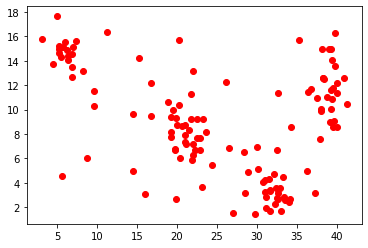

In [ ]:
plt.scatter(dataX, dataY, color='red')

Z vykresleného grafu vidíme, že v datasetu máme pravděpodobně tři třídy. Takhle jednoduché to bohužel většinou není. Ve většině situací máme milióny dat ve stovkách dimenzí, které rozhodně nejsou takhle přehledné.

Tam je sice možné zpozorovat jednotlivé shluky, ale je již těžké ručně stanovit nějakou přesnou hranici (např. intervalem), kterou pomyslně ořízneme data na jednotlivé kategorie. 

Proto využijeme metodu shlukování.

Pomocí algoritmu Kmeans, o kterém si povíme zas někdy jindy, rozdělíme dataset na X nejpodobnějších shluků.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=Tru

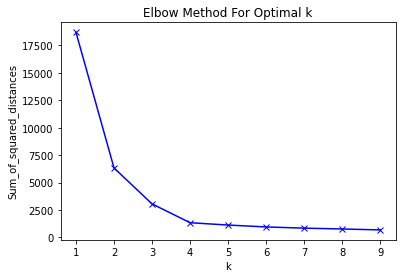

In [ ]:
np_dataset = np.array(dataset)

#Využíváme algoritmu Kmeans s tím že matematickou hatmatilkou dostáváme vzdálenosti ke středu shluku 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(np_dataset)
    print(km)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Tento graf nám říká, jak moc velké rozdíly jsou mezi jednotlivými shluky. Mezi shlukem 1 a 2 pozorujeme velký rozdíl, to zanamená, že to budou rozdílné třídy. To samé platí pro shluky 2 a 3. Naopak mezi shluky 3, 4, 5,..., 9 jsou rozdíly minimální. To znamená, že jsou ze stejné třídy.

Tento graf můžeme vytvořit pro dataset s desítkami dimenzí.

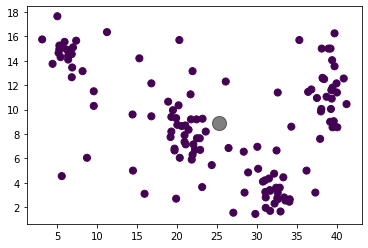

In [ ]:
#Teď je potřeba provést rozdělení do tříd využijeme opět algoritmus Kmenas
#Zde můžete experimentovat
#@title Nastavení počtu shluků, do kterých se mají data rozdělit {run:"auto"}
pocet_shluku = 1 #@param {type:"slider", min:1, max:10, step:1}

km = KMeans(n_clusters=pocet_shluku)
km = km.fit(np_dataset)
y_kmeans = km.predict(np_dataset)


plt.scatter(np_dataset[:, 0], np_dataset[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

V grafu vidíme barevně oddělené jednotlivé shluky.

Co jsou ty šedé tečky? To jsou středy našich shluků. V podstatě nám říkají, jak by měl vypadat průměrný bod shluku. Tento průměrný bod si můžeme představt jako např. průměrné parametry produktu v dané kategorii.

Dále je důležité rozlištit klasifikaci a třídění do tříd protože si musíte uvědomit že tady počítač neměl žádnou informaci kromě dat samotných a počtu hledaných kategorií. 

# Predikce

Poslední úloha na kterou se zaměříme je predikce.

Například si představme, že chceme vědět kolik se v následujícím období prodá zmrzliny. Použijeme data z prodejů za minulé období a počet dětí ve městě a necháme to vše uvařit pomocí AI. (Přiznám se, že tady budeme trošku podvádět a k učení využejeme jen klasickou regresi.)

V následujícím bloku kódu uvidíte, jak se lineární regrese aplikuje na vzorová (popř. vaše) data. Můžete zkusit měnit parametry a sledovat, jak se mění tvar křivky. Pro vysoké stupně polynomů je vhodné přepnout na logaritmickou metriku, kde bude lépe vidět, jak přesně křivka popisuje vstupní data.

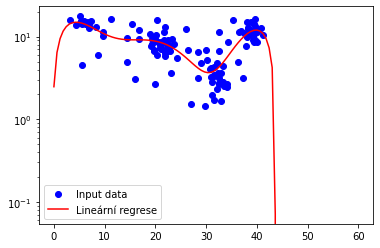

In [ ]:
#@title Lineární regrese dat a predikce {run:"auto"}

#import potřebných knihoven
import numpy as np
import matplotlib.pyplot as plt

#@markdown Stupeň polynomu predikující průběh dat
degree = 6 #@param {type:"slider", min:1, max:10, step:1}

#vytvoření regresního modelu a nastavení parametrů regrese
polyRegModel = np.poly1d(np.polyfit(dataX, dataY, degree))
#@markdown Interval pro který se bude vykreslovat regrese (zadej ve formátu: **start, end**)
vykreslovaciInterval =  0,60 #@param
#@markdown Počet vzorků v intervalu (celé číslo) 
pocetVzorku = 100 #@param {type:"integer"}
interval = np.linspace(vykreslovaciInterval[0],vykreslovaciInterval[1],100)

#vykreslení dat
plt.plot(dataX, dataY,'bo')
plt.plot(interval,polyRegModel(interval),color='red')
plt.legend(['Input data', 'Lineární regrese'])
#@markdown metrika osy y
scale = 'log' #@param ["linear", "log"] {type:"string"}
plt.yscale(scale)